In [1]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
plt.style.use('ggplot')
%matplotlib inline


In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [7]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

,0
ID,30000
LIMIT_BAL,81
SEX,2
EDUCATION,7
MARRIAGE,4
AGE,56
PAY_0,11
PAY_2,11
PAY_3,11
PAY_4,11


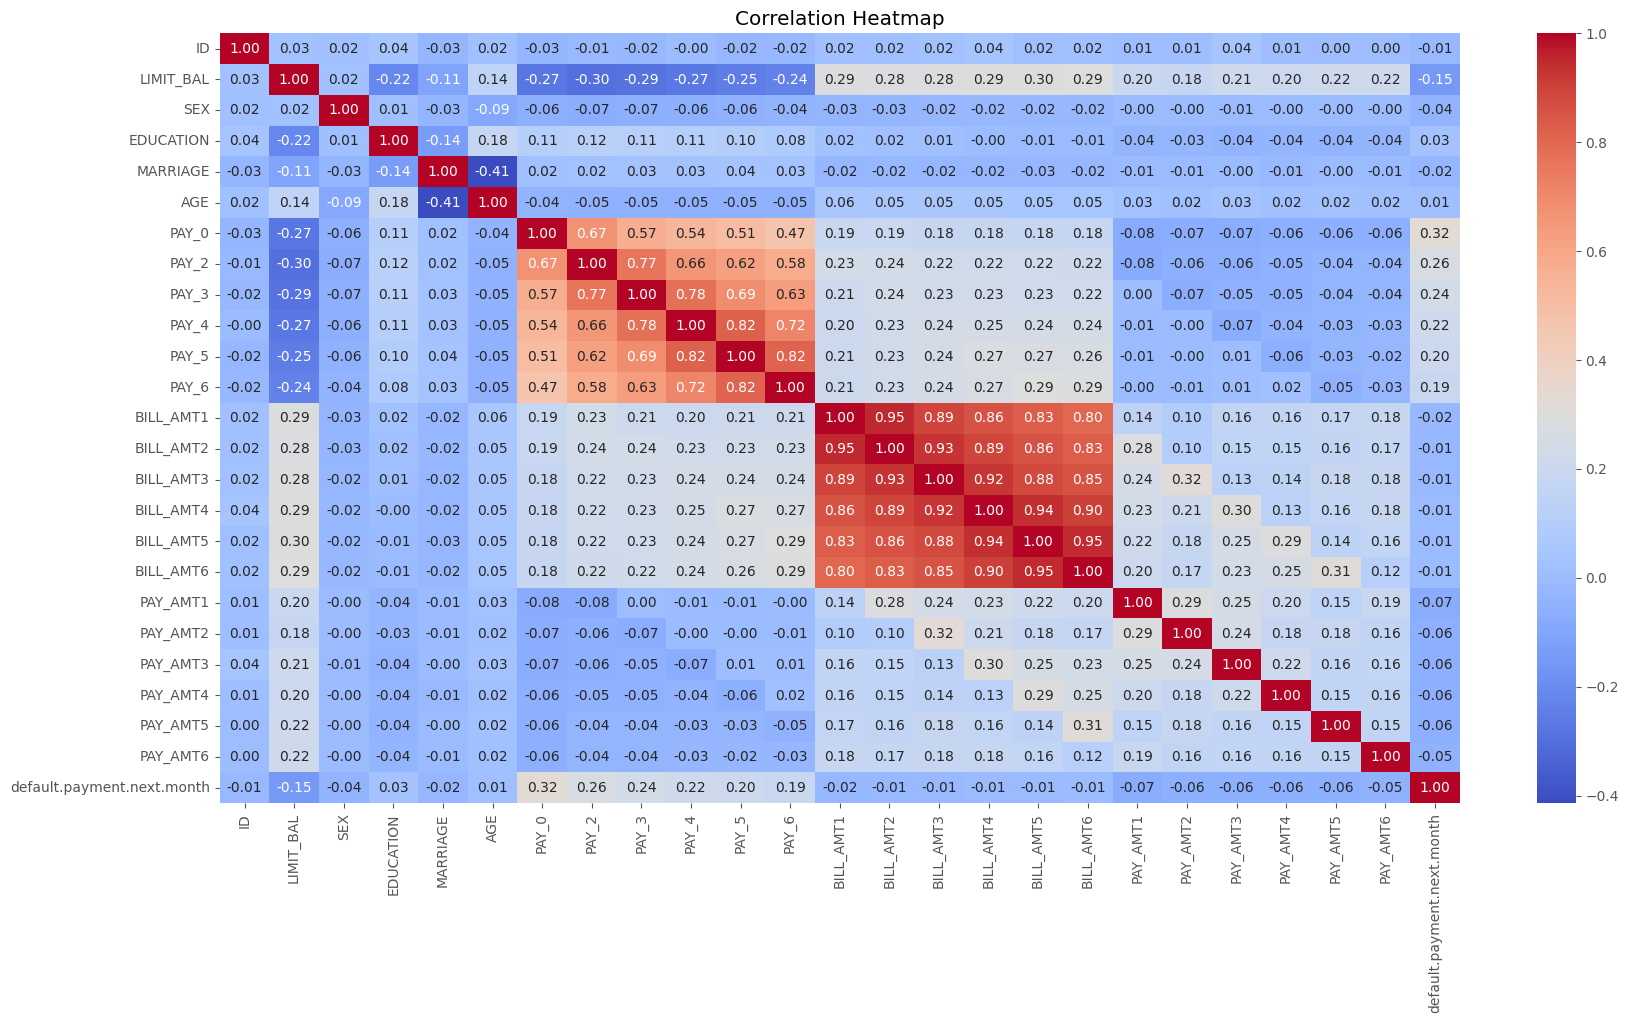

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm' )
plt.title('Correlation Heatmap')
plt.show()

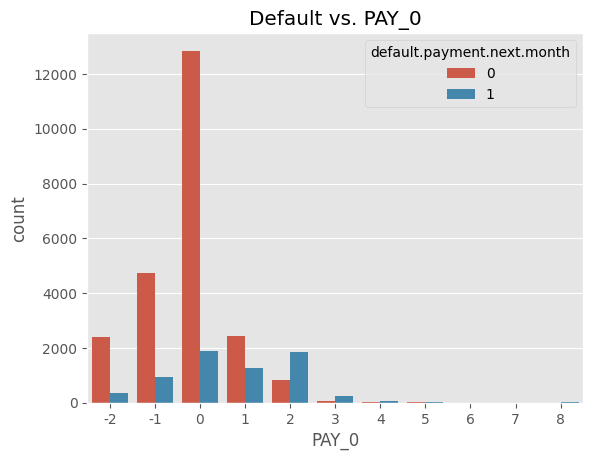

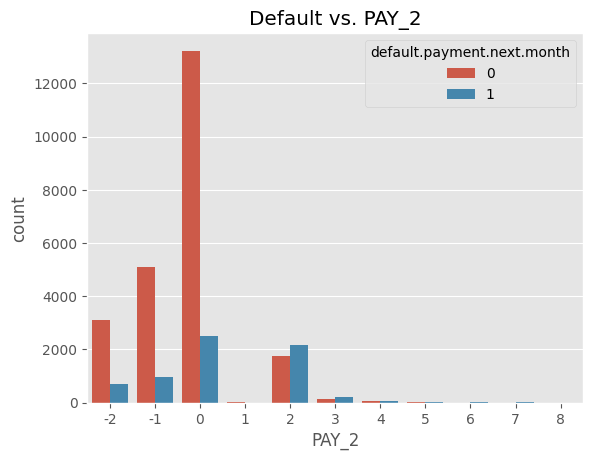

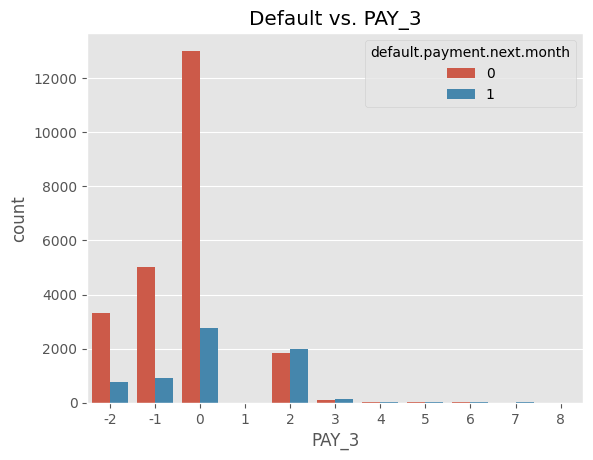

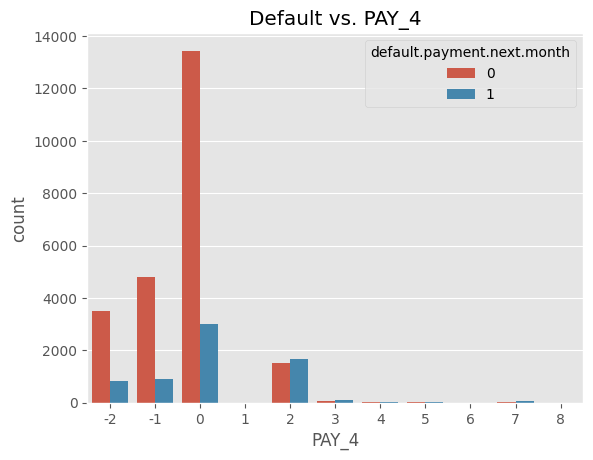

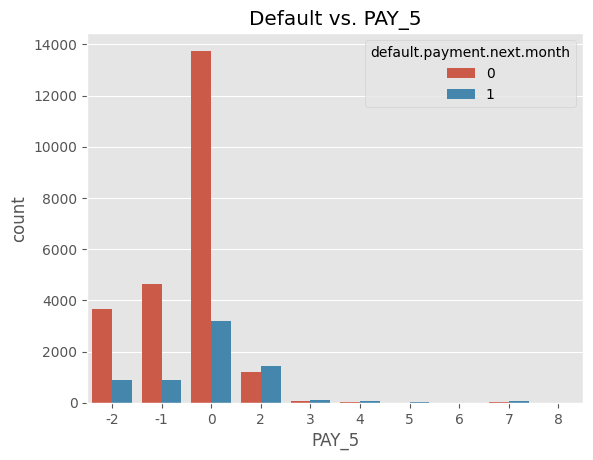

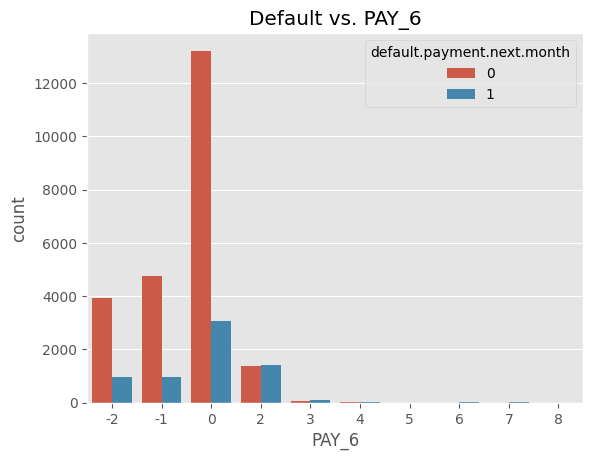

In [13]:
payment_history_columns = ['PAY_0', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']
for col in payment_history_columns:
  sns.countplot(x = col, hue = 'default.payment.next.month', data = df)
  plt.title(f'Default vs. {col}')
  plt.show()

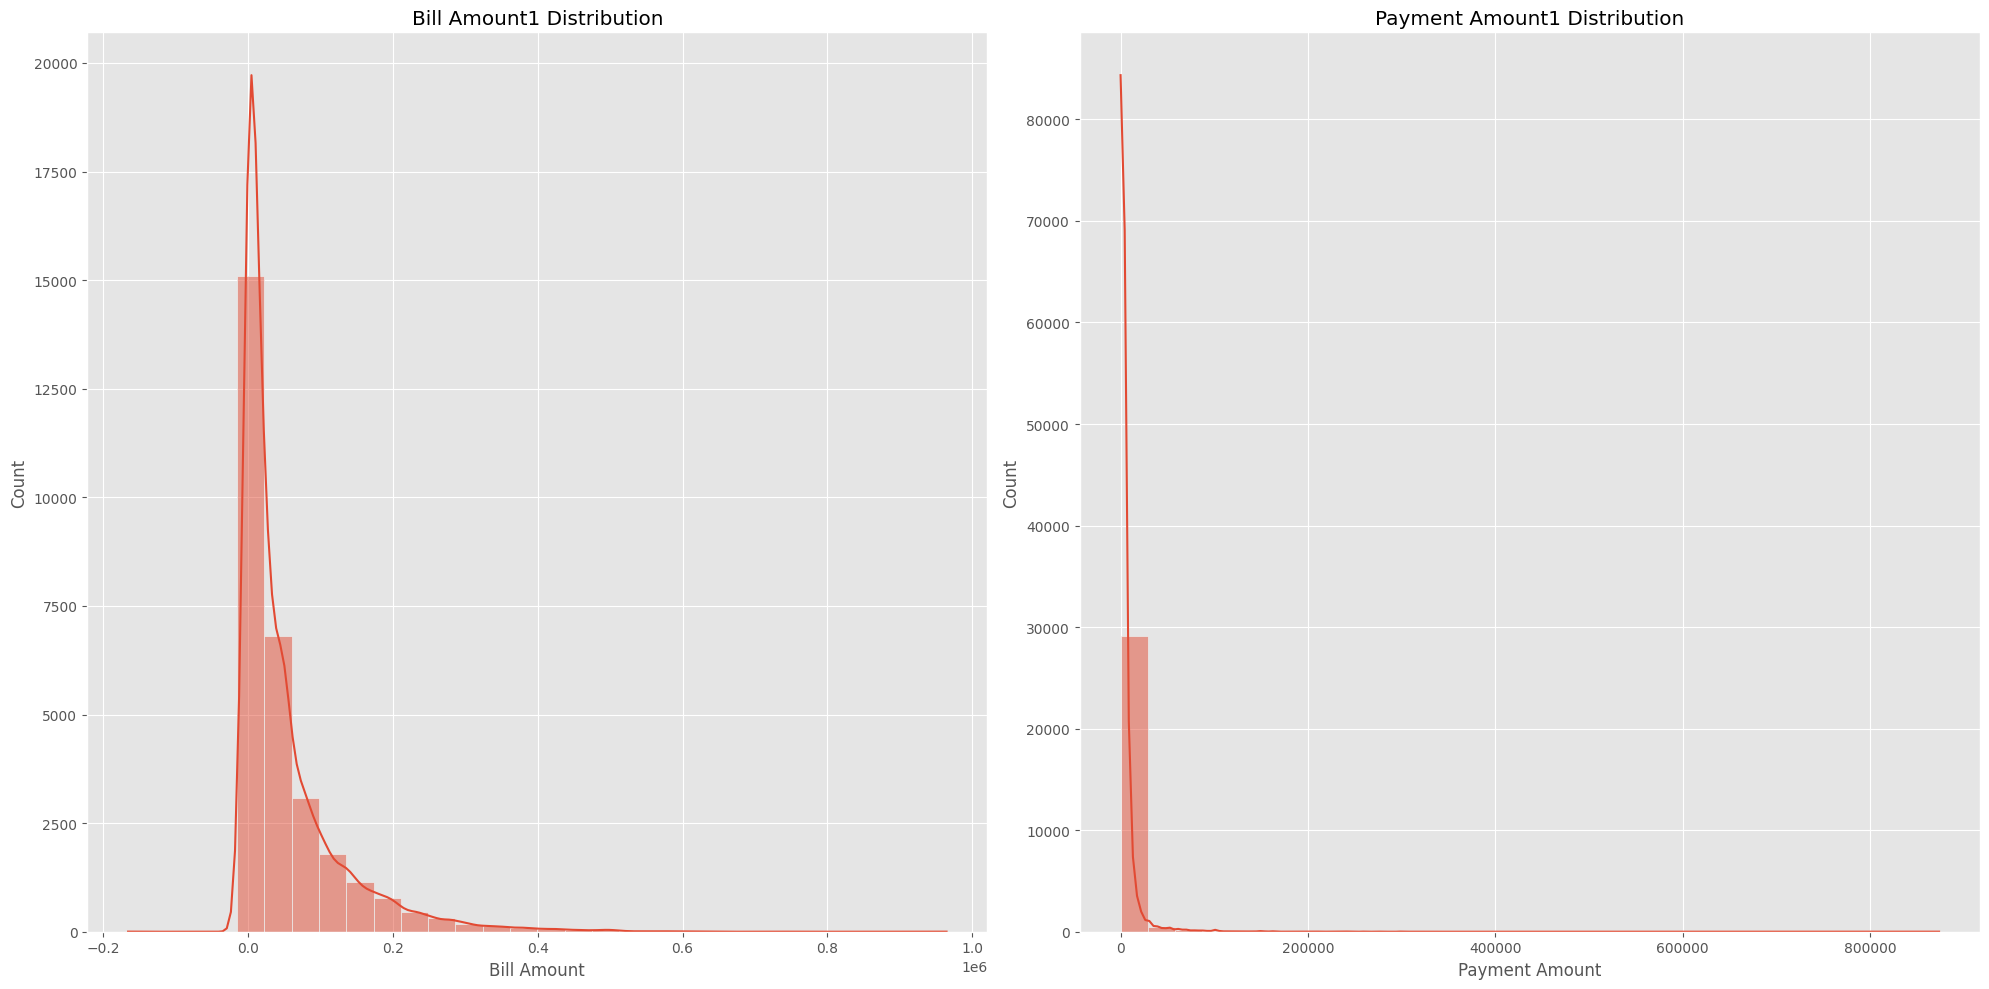

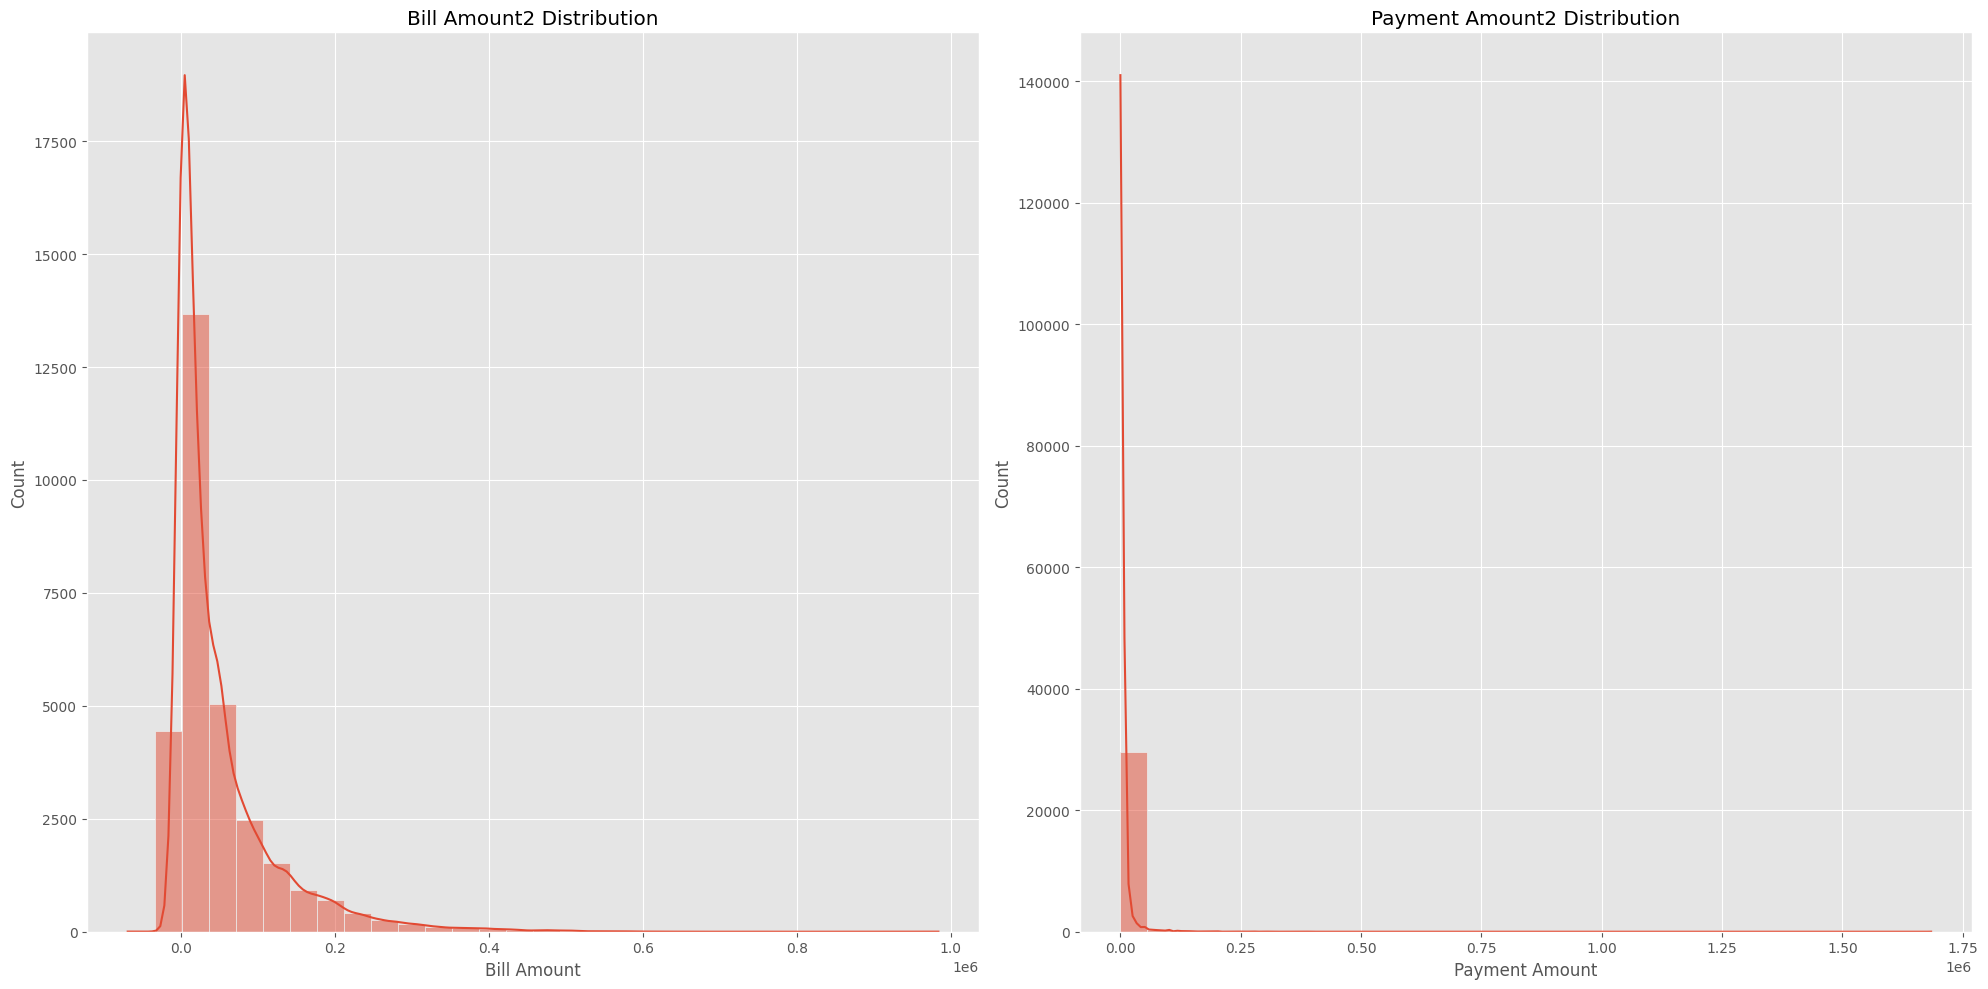

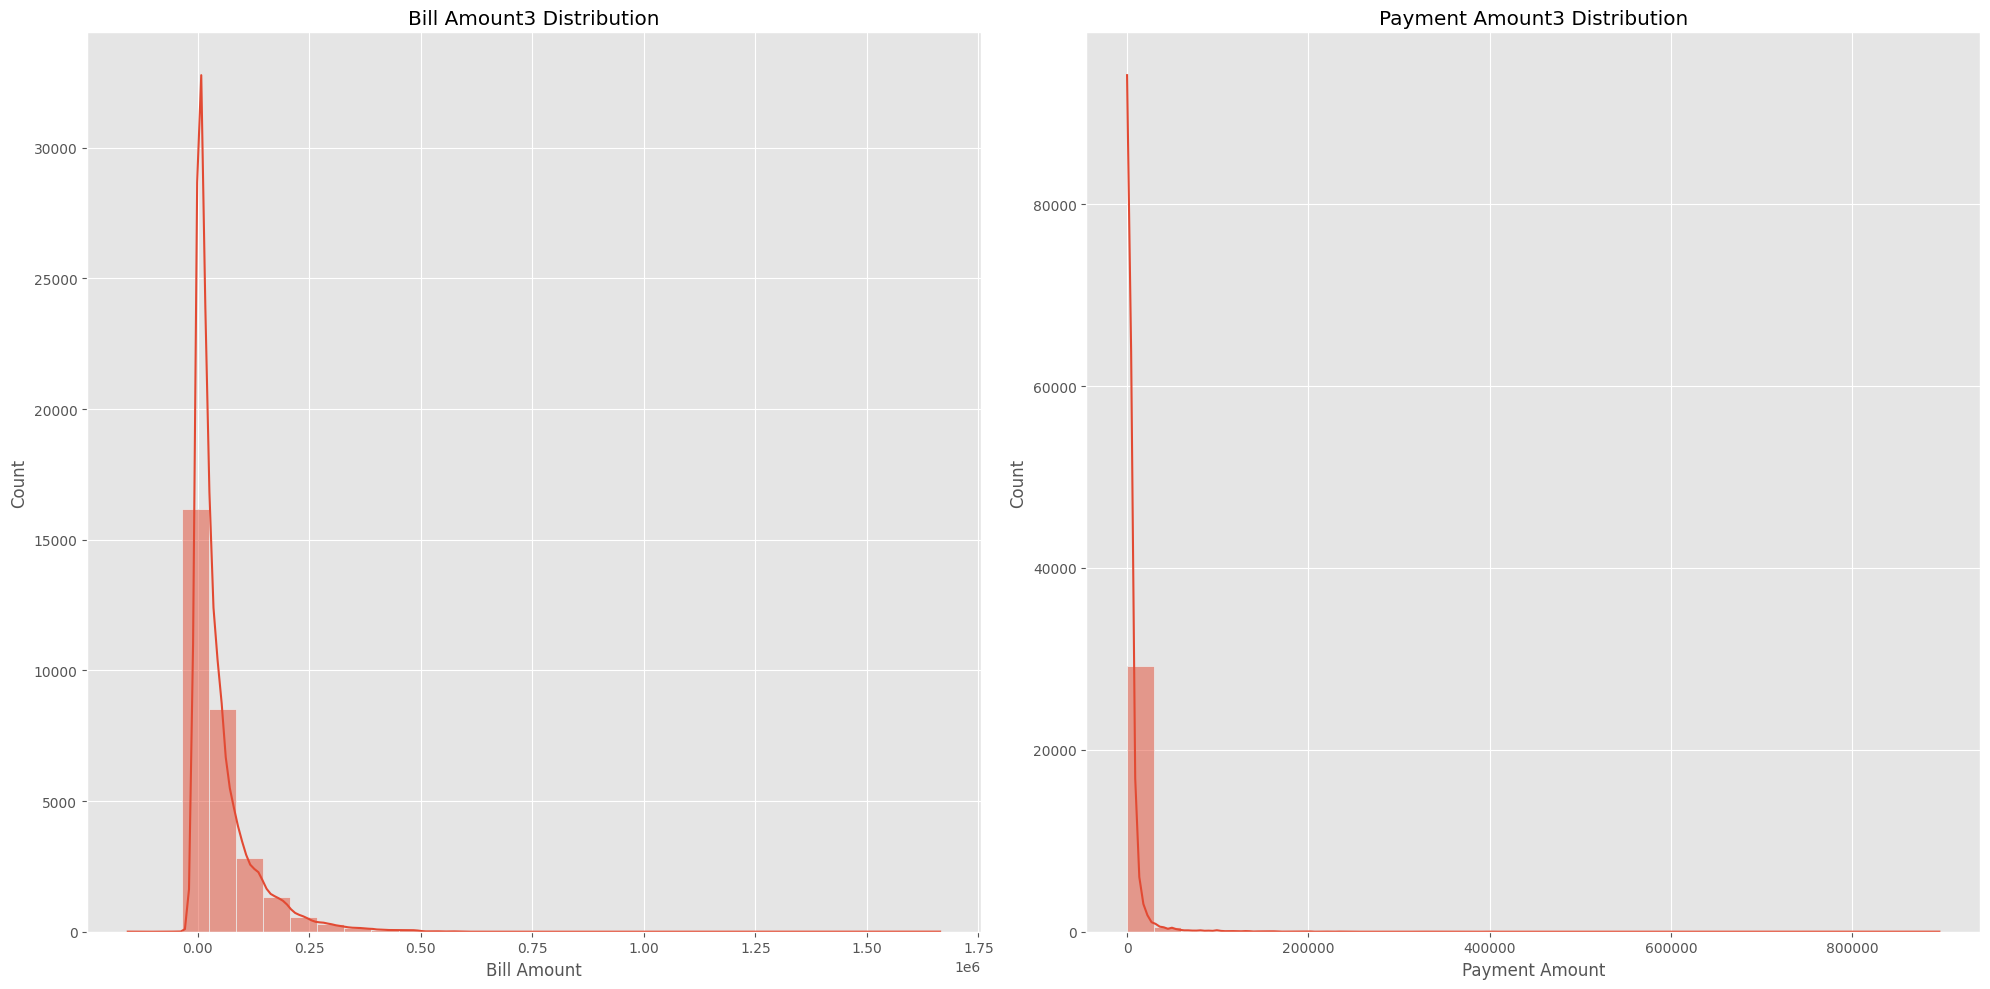

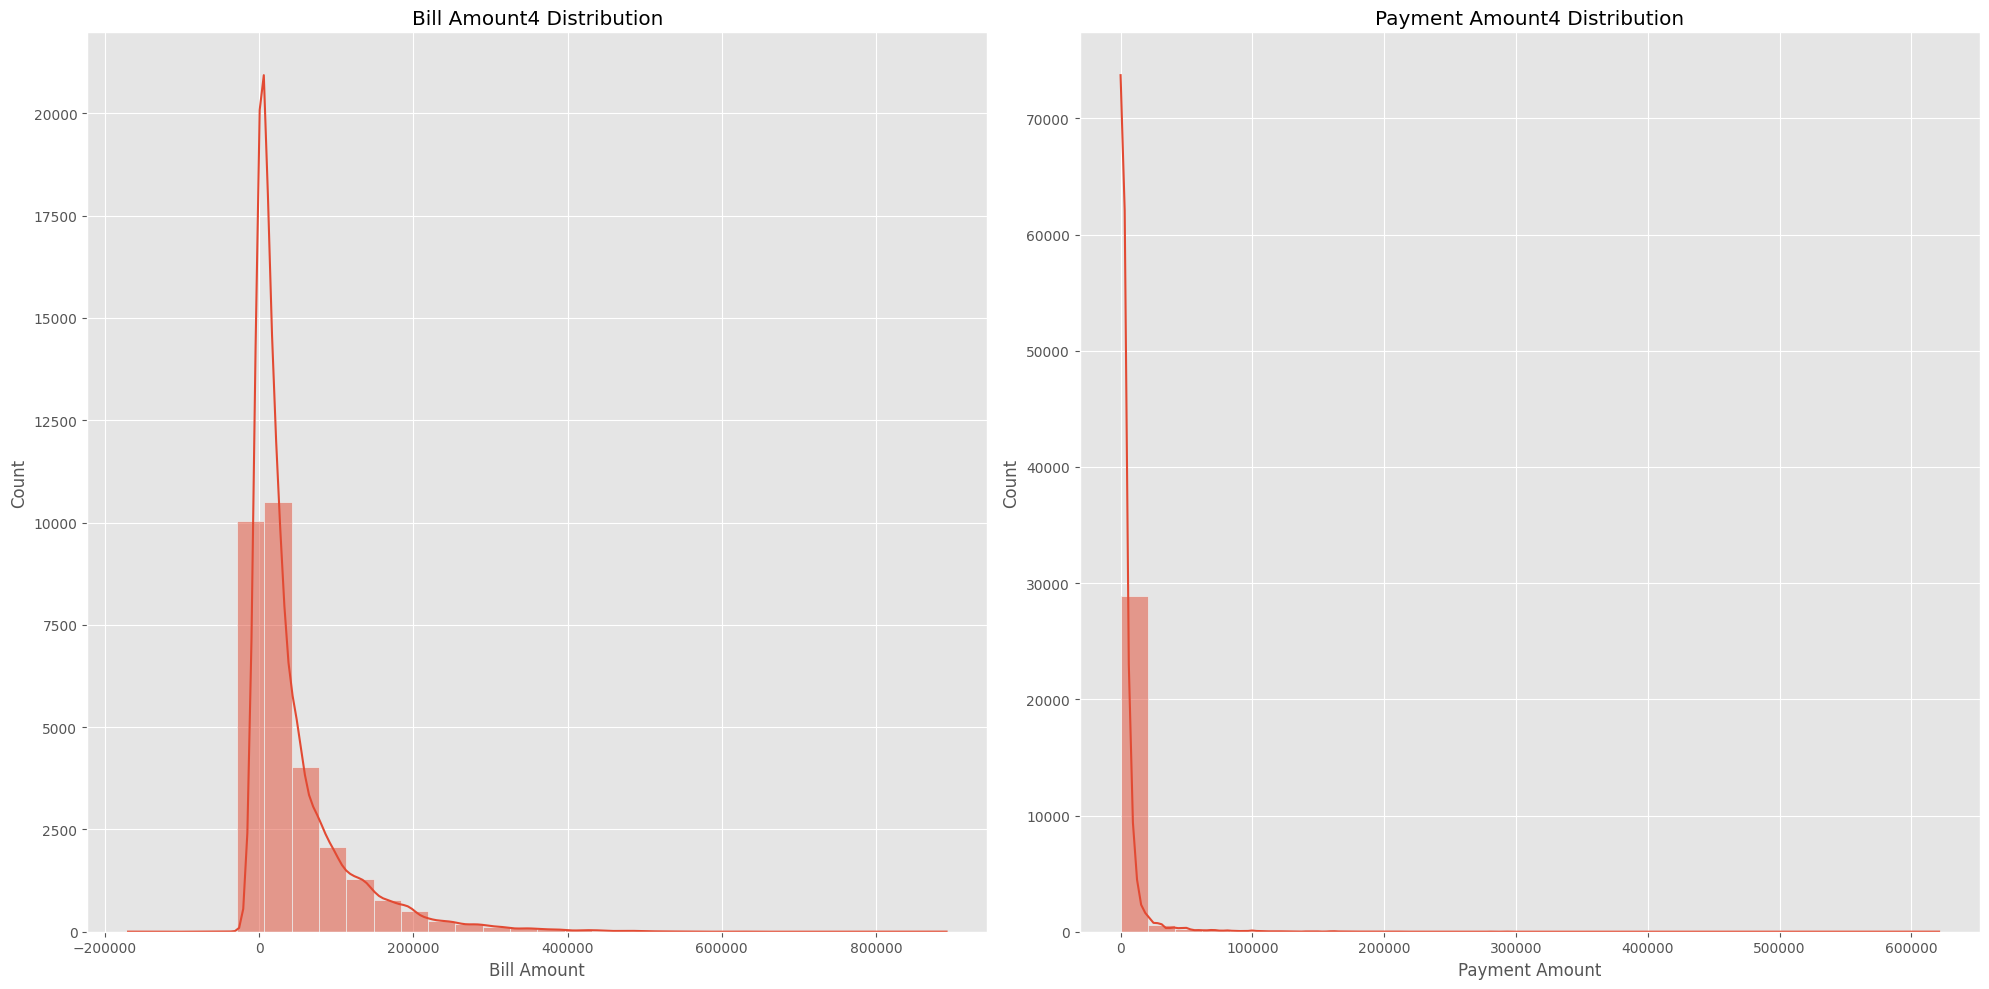

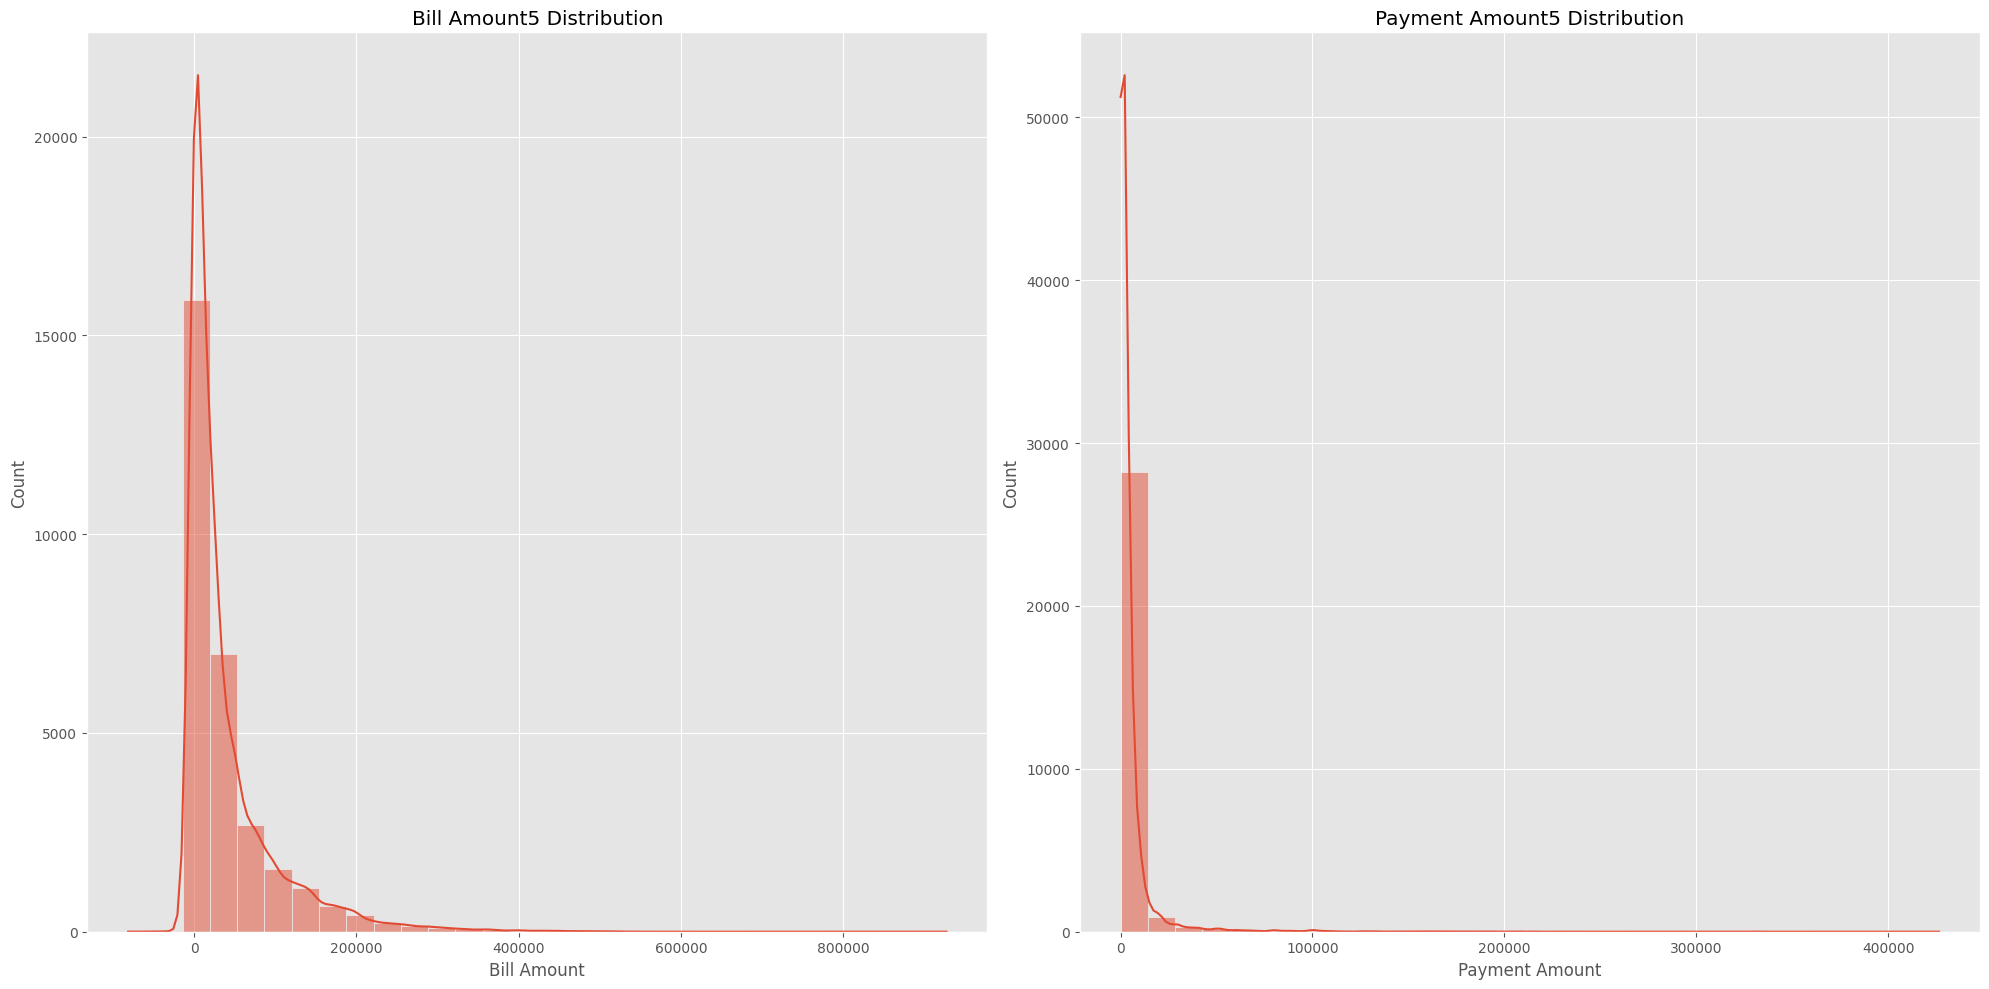

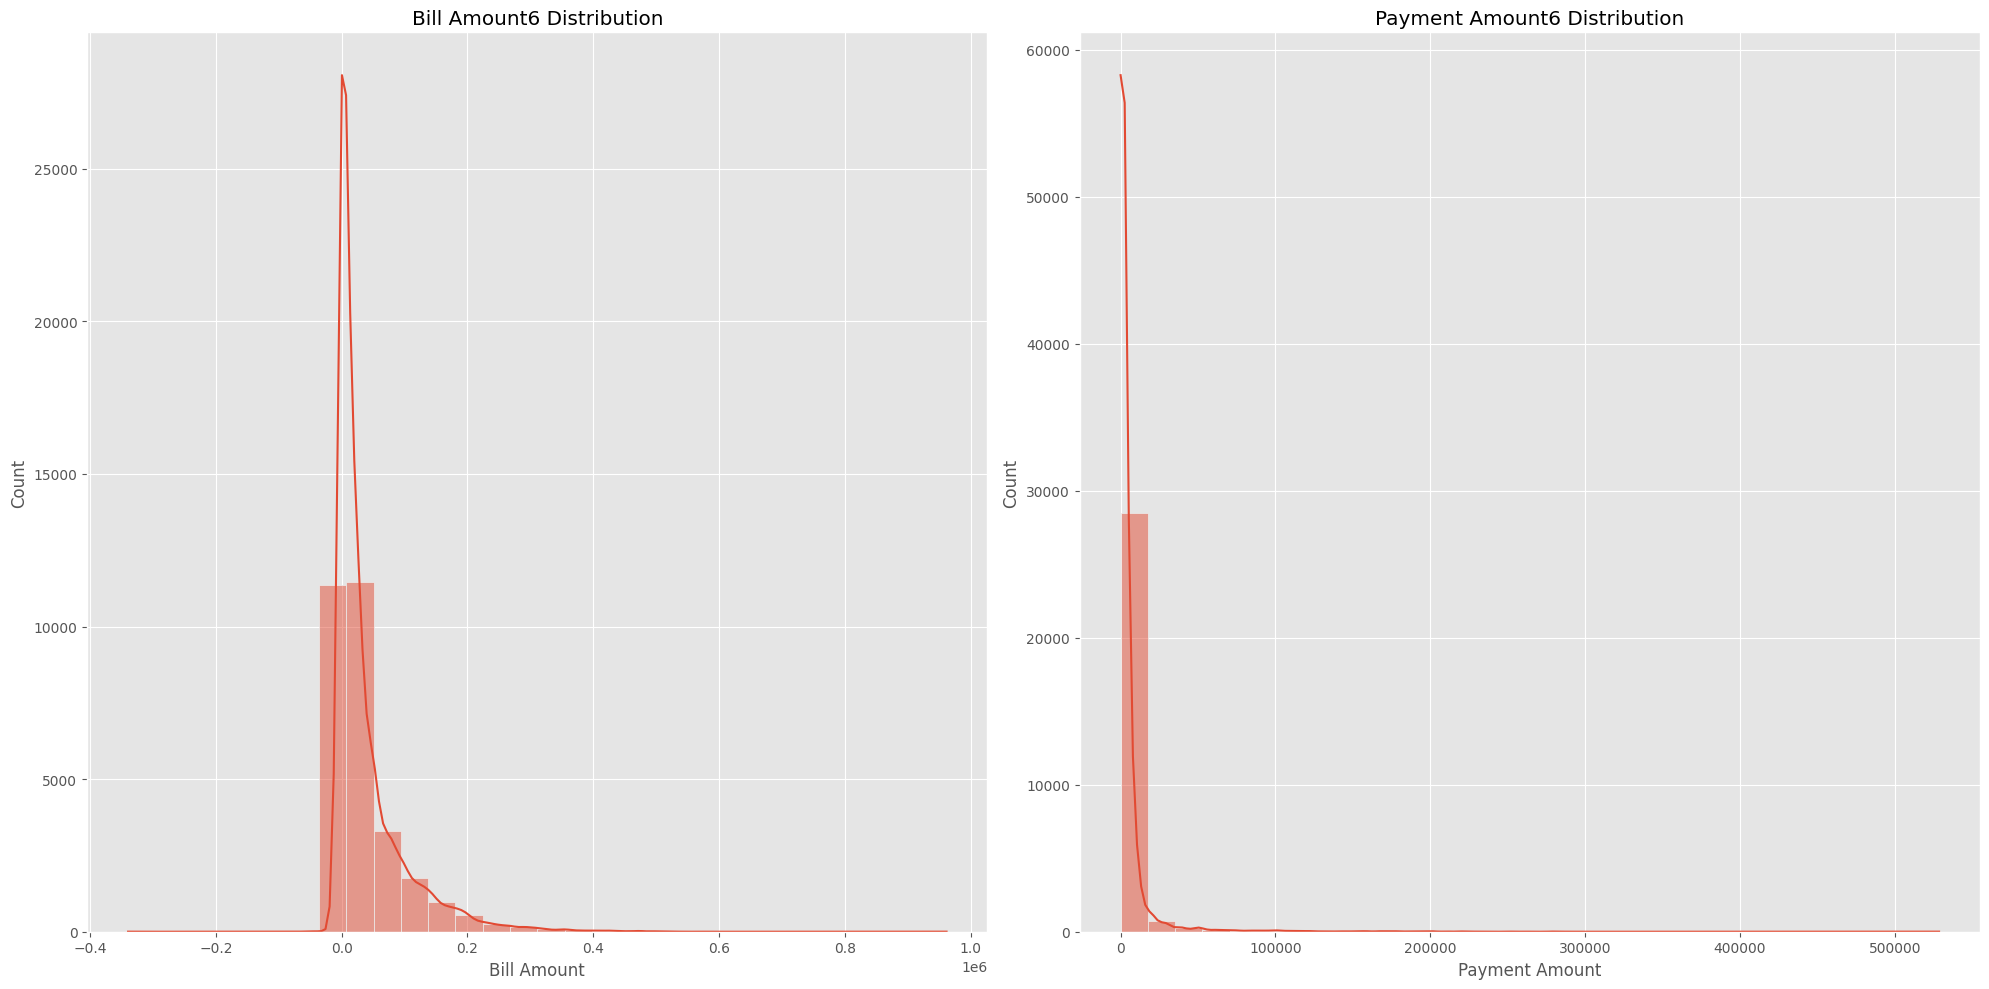

In [15]:
for i in range(1,7):
  plt.figure(figsize = (20,10))
  plt.subplot(1,2,1)
  sns.histplot(df[f'BILL_AMT{i}'],bins = 30, kde = True)
  plt.title(f'Bill Amount{i} Distribution')
  plt.xlabel('Bill Amount')
  plt.ylabel('Count')

  plt.subplot(1,2,2)
  sns.histplot(df[f'PAY_AMT{i}'],bins = 30, kde = True)
  plt.title(f'Payment Amount{i} Distribution')
  plt.xlabel('Payment Amount')
  plt.ylabel('Count')

  plt.tight_layout()
  plt.show



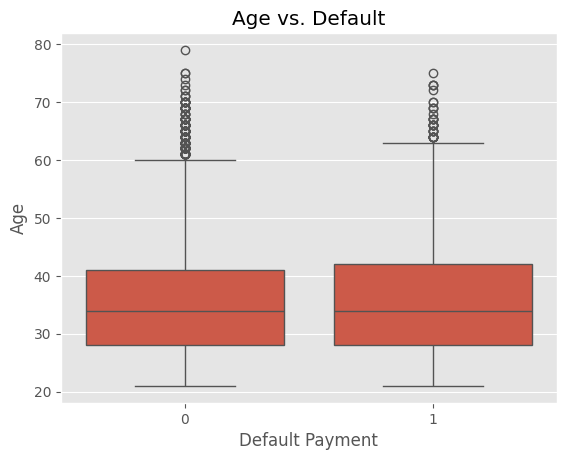

In [16]:
sns.boxplot(x = 'default.payment.next.month', y = 'AGE', data = df)
plt.title('Age vs. Default')
plt.xlabel('Default Payment')
plt.ylabel('Age')
plt.show()

<ipython-input-17-e47fbcbc24c3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LIMIT_BAL'], kde = True, bins = 200, color = 'red')


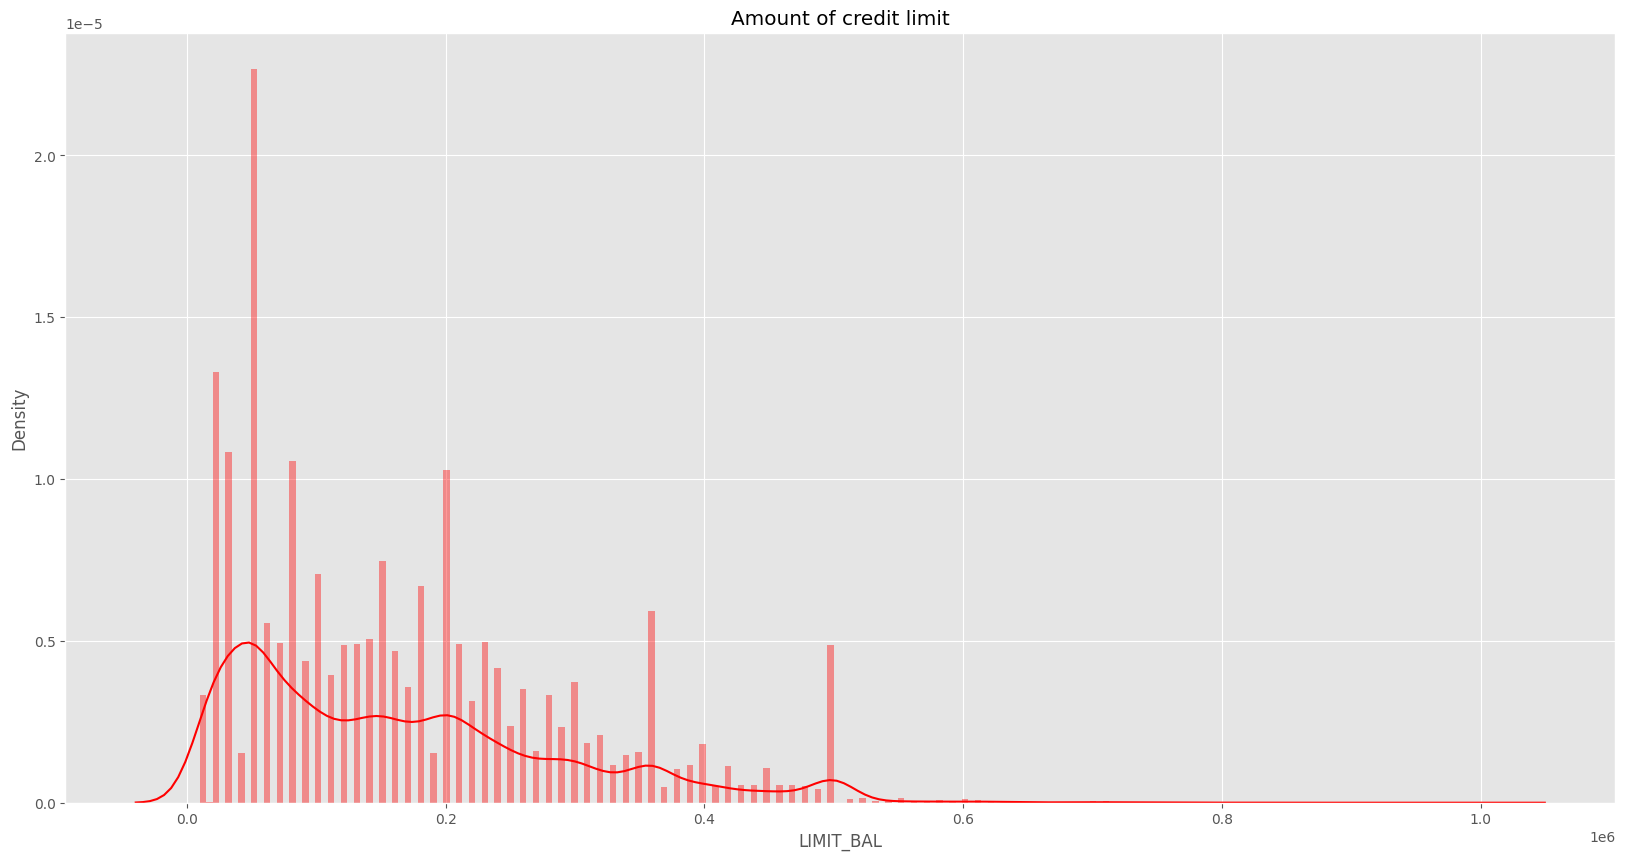

In [17]:
plt.figure(figsize = (20,10))
plt.title('Amount of credit limit')
sns.distplot(df['LIMIT_BAL'], kde = True, bins = 200, color = 'red')
plt.show()

In [20]:
df['LIMIT_BAL'].value_counts().head()

,count
LIMIT_BAL,
50000.0,3365
20000.0,1976
30000.0,1610
80000.0,1567
200000.0,1528


<ipython-input-21-57e30a576a97>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class_1, kde = True, bins = 200, color = 'blue')
<ipython-input-21-57e30a576a97>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class_0, kde = True, bins = 200, color = 'red')


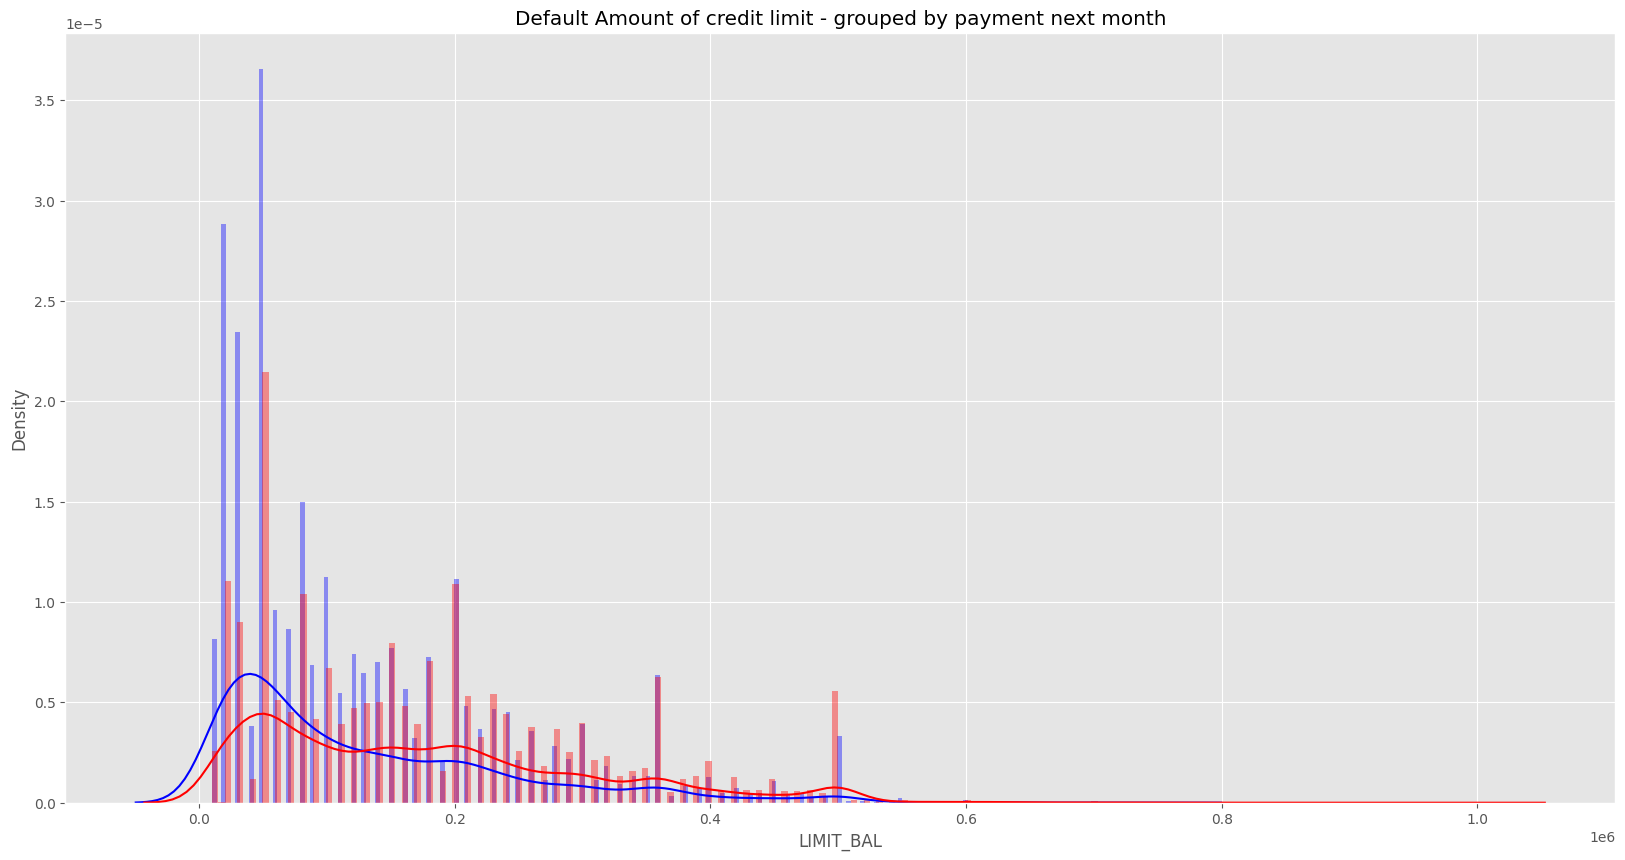

In [21]:
class_0 = df.loc[df['default.payment.next.month'] == 0]['LIMIT_BAL']
class_1 = df.loc[df['default.payment.next.month'] == 1]['LIMIT_BAL']

plt.figure(figsize = (20,10))
plt.title('Default Amount of credit limit - grouped by payment next month')
sns.distplot(class_1, kde = True, bins = 200, color = 'blue')
sns.distplot(class_0, kde = True, bins = 200, color = 'red')
plt.show()



In [22]:
df = df.drop('ID', axis = 'columns')

In [28]:
df.sample()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
27110,130000.0,1,2,1,37,0,0,0,2,2,2,25991.0,28053.0,30891.0,30096.0,32169.0,31520.0,2500.0,3300.0,0.0,2578.0,0.0,3225.0,1


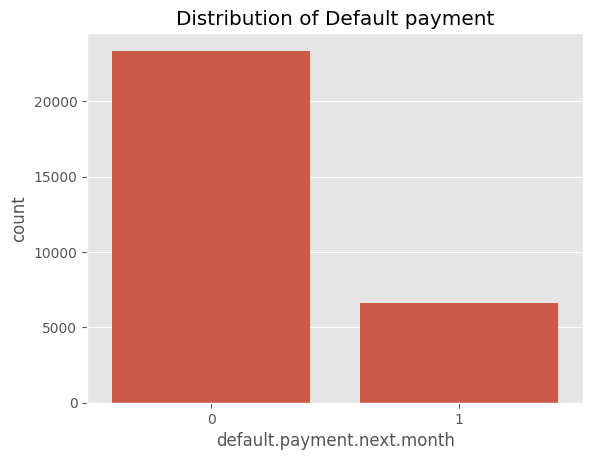

In [29]:
sns.countplot(x = 'default.payment.next.month', data = df)
plt.title('Distribution of Default payment')
plt.show()

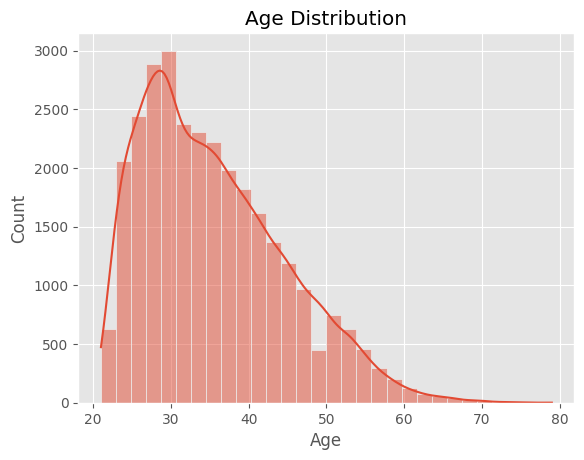

In [30]:
sns.histplot(df['AGE'], bins = 30, kde = True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<Axes: >

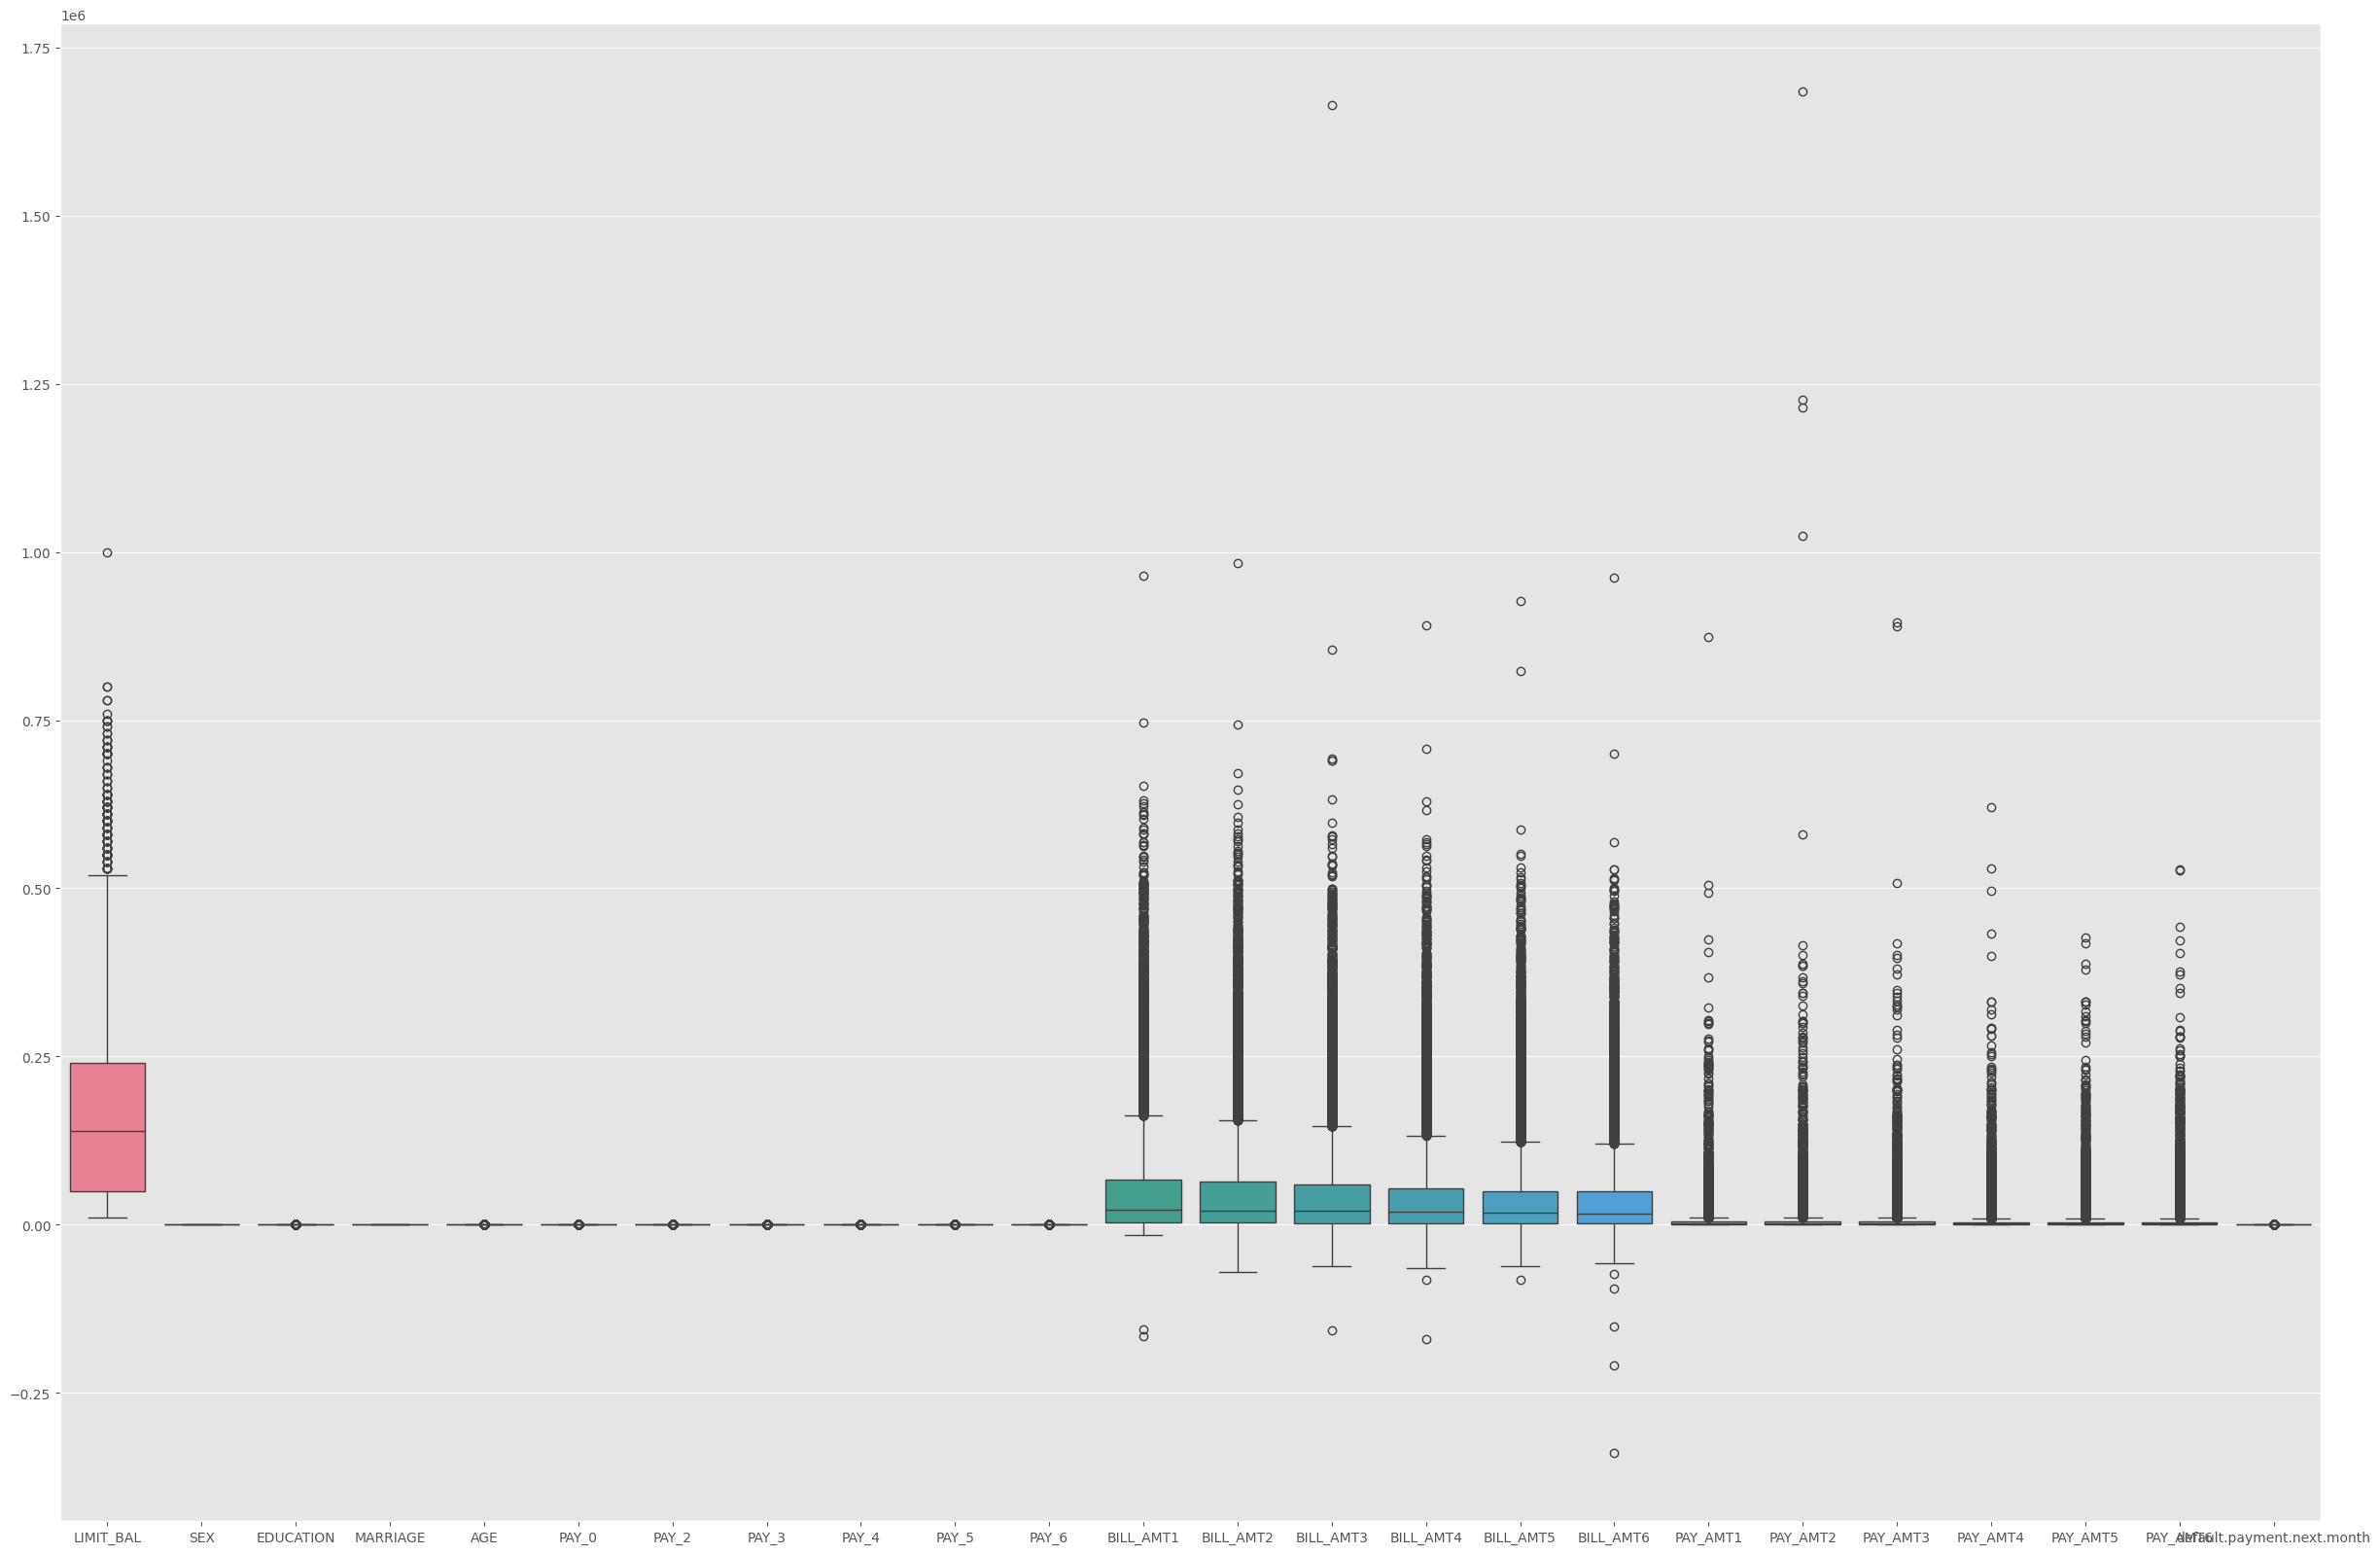

In [33]:
plt.figure(figsize= (30,20))
sns.boxplot(data = df)


In [46]:
x = df.drop('default.payment.next.month', axis = 1)
y = df['default.payment.next.month']

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [40]:
x_train.shape

(37382, 23)

In [47]:
df.shape

(30000, 24)

In [48]:
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

In [49]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
accuracy = accuracy_score(y_test, y_pred)

In [51]:
accuracy

0.81

In [53]:
report = classification_report(y_test, y_pred)


In [54]:
report

'              precision    recall  f1-score   support\n\n           0       0.82      0.97      0.89      4687\n           1       0.69      0.24      0.35      1313\n\n    accuracy                           0.81      6000\n   macro avg       0.76      0.60      0.62      6000\nweighted avg       0.79      0.81      0.77      6000\n'

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_scaled, y_train)
y_pred_dt = dt_model.predict(x_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.725
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.38      0.41      0.39      1313

    accuracy                           0.72      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.72      0.73      6000



In [59]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_scaled, y_train)
y_pred_dt = dt_model.predict(x_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.725
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.38      0.41      0.39      1313

    accuracy                           0.72      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.72      0.73      6000



In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_scaled, y_train)
y_pred_rf = rf_model.predict(x_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.816
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_train_scaled, y_train)
y_pred_gb = gb_model.predict(x_test_scaled)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [62]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(x_train_scaled, y_train)
y_pred_svm = svm_model.predict(x_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8193333333333334
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4687
           1       0.68      0.33      0.45      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    # ... other hyperparameters
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(x_test_scaled)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Best Random Forest Accuracy: {accuracy_best_rf}")
print(classification_report(y_test, y_pred_best_rf))

Best Random Forest Accuracy: 0.819
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [64]:
features_importance = pd.Series(model.coef_[0], index = x.columns)
features_importance = features_importance.abs().sort_values(ascending = False)
print(features_importance)

PAY_0        0.649054
BILL_AMT1    0.364502
PAY_AMT2     0.249047
PAY_AMT1     0.171703
BILL_AMT2    0.125537
BILL_AMT3    0.120595
PAY_2        0.109360
LIMIT_BAL    0.106729
MARRIAGE     0.079040
EDUCATION    0.077808
PAY_3        0.076972
AGE          0.076778
BILL_AMT4    0.060790
SEX          0.056139
PAY_AMT4     0.055655
PAY_4        0.052052
PAY_AMT6     0.047620
BILL_AMT5    0.034406
BILL_AMT6    0.028835
PAY_AMT3     0.024774
PAY_AMT5     0.023396
PAY_5        0.022620
PAY_6        0.014968
dtype: float64


In [65]:
import pickle
pickle.dump(gb_model, open('model.pkl', 'wb'))